## Importing required dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data collection and pre-processing

In [2]:
# loading the csv file in pandas dataframe
gold_df = pd.read_csv('gld_price_data.csv')
# Showing 1st 5 rows
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
# showing last 5 rows
gold_df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
# Number of rows and columns
print(f'Number of rows and columns: {gold_df.shape}')

Number of rows and columns: (2290, 6)


In [7]:
# Getting some basic information of data
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# Checking the number of missing values
gold_df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

There is no missing values in data

In [9]:
# Getting the statistical measures of the data
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation

- Positive correlaton
- Negative correlation

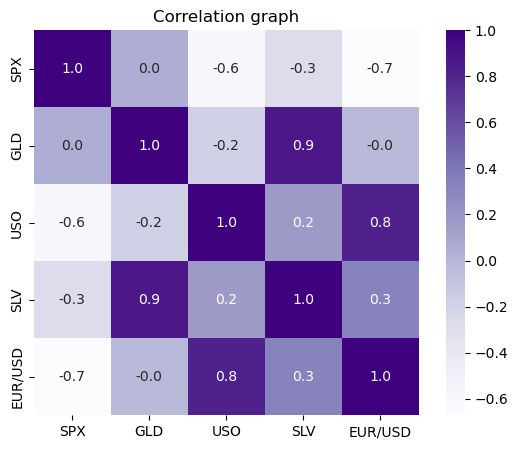

In [26]:
correlation = gold_df.corr(numeric_only=True)

# Constructing a heatmap to understand the correlation
plt.figure(figsize = (7,5))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 10}, cmap = 'Purples')
plt.title('Correlation graph')
plt.show()

### Analysis
- GLD and SLV has positive correlation
- USD and SPX has negative correlation

In [27]:
# Showing correlation values for GLD
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

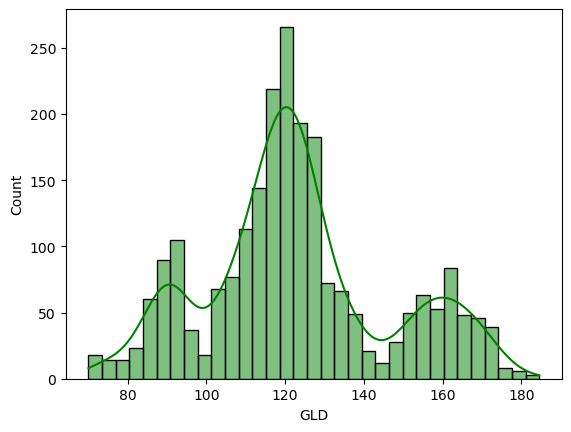

In [33]:
# Checking the distribution of the GOLD Price
sns.histplot(gold_df['GLD'], color = 'green', kde = True)
plt.show()

## Separating the features and targets

In [34]:
X = gold_df.drop(['Date','GLD'], axis = 1)
y = gold_df['GLD']

In [36]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


## Splitting the dataset into training and testing sets

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [39]:
print(f'Number of training examples: {x_train.shape[0]}\nNumber of testing examples: {x_test.shape[0]}')

Number of training examples: 1603
Number of testing examples: 687


## Model Training

In [40]:
rf_regressor = RandomForestRegressor(n_estimators = 100)

In [41]:
rf_regressor.fit(x_train, y_train)

RandomForestRegressor()

## Model evaluation

In [42]:
pred = rf_regressor.predict(x_test)

In [43]:
# showing the 1st 10 prediction values
pred[:10]

array([122.64399908, 130.26910323, 127.68749984,  97.74939915,
       118.91760046, 114.51719952, 124.79510153, 117.84269996,
       108.01050097,  98.85339952])

In [45]:
# R-Square
error_score = metrics.r2_score(y_test,pred)
print('R-Square: ', np.round(error_score, 3))

R-Square:  0.99


In [47]:
print('Mean Square Error: ', np.round(metrics.mean_squared_error(y_test,pred),3))

Mean Square Error:  5.74


## Comparing the Actual values and Predicted values in a plot

In [51]:
# Firstly convert the y_test type into list
y_test_list = list(y_test)
type(y_test_list)

list

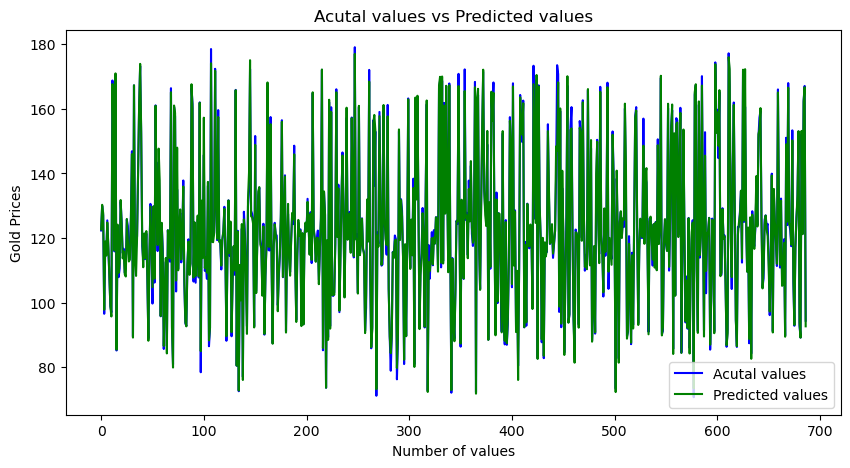

In [59]:
plt.figure(figsize = (10,5))
plt.plot(y_test_list, color = 'blue', label = 'Acutal values')
plt.plot(pred, color = 'green', label = 'Predicted values')
plt.title('Acutal values vs Predicted values')
plt.xlabel('Number of values')
plt.ylabel('Gold Prices')
plt.legend()
plt.show()